# How food shapes the World - Ada project

With 7.7 billion people around the world in 2019, food demand outbreak has raised serious concerns regarding productive agricultural land availability. As for now cultivable surface expansion has been the only real solution, this project aims at providing insights on how this problematic is currently shaping the world’s surface as we know it. Investigation will first focus on the kind of environment that are being impinged on. Moving on to the “destructive” impact of certain foodstuffs and diet trends, correlating with international trade flows. This study relies on FAOSTAT data set from the United Nation, helping us in the process.
We endeavor at providing an exhaustive visualization of the world under growing food reshaping pressure. Key features will be surface evolution across time and space, selected crops impact as well as involved parties and areas. Tackling all of the above with both social awareness and self consciousness concerns.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 



## Opening the dataset

First of all, we need to open the dataset on which we are working. That is, loading it and displayint as much of it as possible to get a better view from it.

In [2]:
datapath = "Data/global-food-agriculture-statistics/"
current_fao = "current_FAO/raw_files/"

savanna = pd.read_csv(datapath + current_fao + "Emissions_Agriculture_Burning_Savanna_E_All_data_(Norm).csv", sep=",", encoding="latin_1")  # Less savanna
crops = pd.read_csv(datapath + "fao_data_crops_data.csv", sep=",", encoding="latin_1")                                                     # Where every products are planted
forests = pd.read_csv(datapath + current_fao + "Emissions_Land_Use_Forest_Land_E_All_Data_(Norm).csv", sep=",", encoding="latin_1")         # Less forests
livestock = pd.read_csv(datapath + current_fao + "Trade_Crops_Livestock_E_All_Data_(Normalized).csv", sep=",", encoding="latin_1")     
item_codes=pd.read_csv(datapath + current_fao +"export_items_1574515779.csv",sep=";", encoding="latin_1")#FAO commodities item codes 


Now let's display these dataset and their types quickly : 

### Savanna :

In [3]:
savanna.dtypes

Country Code      int64
Country          object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object

In [4]:
savanna.head(5)

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6760,Savanna,7246,Burned Area,1990,1990,Ha,0.9251,Fc
1,2,Afghanistan,6760,Savanna,7246,Burned Area,1991,1991,Ha,0.9251,Fc
2,2,Afghanistan,6760,Savanna,7246,Burned Area,1992,1992,Ha,0.9251,Fc
3,2,Afghanistan,6760,Savanna,7246,Burned Area,1993,1993,Ha,0.9251,Fc
4,2,Afghanistan,6760,Savanna,7246,Burned Area,1994,1994,Ha,0.9251,Fc


### Crops

In [3]:
crops.dtypes

country_or_area     object
element_code        object
element             object
year               float64
unit                object
value              float64
value_footnotes     object
category            object
dtype: object

In [6]:
crops.head(5)

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,31,Area Harvested,2007.0,Ha,49404.0,A,agave_fibres_nes
1,Americas +,31,Area Harvested,2006.0,Ha,49404.0,A,agave_fibres_nes
2,Americas +,31,Area Harvested,2005.0,Ha,49404.0,A,agave_fibres_nes
3,Americas +,31,Area Harvested,2004.0,Ha,49113.0,A,agave_fibres_nes
4,Americas +,31,Area Harvested,2003.0,Ha,48559.0,A,agave_fibres_nes


In [277]:
crops.value_footnotes.unique()

array(['A ', 'F ', nan, 'Fc', 'NR'], dtype=object)

In [280]:
crops.category.unique()
intervals = crops.groupby('category').count()


### Forests

In [4]:
forests.dtypes

Country Code      int64
Country          object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object

In [5]:
forests.head(5)

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6661,Forest,5110,Area,1990,1990,1000 Ha,1350.0,F
1,2,Afghanistan,6661,Forest,5110,Area,1991,1991,1000 Ha,1350.0,F
2,2,Afghanistan,6661,Forest,5110,Area,1992,1992,1000 Ha,1350.0,F
3,2,Afghanistan,6661,Forest,5110,Area,1993,1993,1000 Ha,1350.0,F
4,2,Afghanistan,6661,Forest,5110,Area,1994,1994,1000 Ha,1350.0,F


### Livestock

**A) Feature investigation**\
Lets first take a look at feature types, values, and scales

In [6]:
livestock.dtypes

Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object

Only Value feature is a float for which distribution plot may or my not be intersting. Otherwise, the rest is either a coded int or object element.

In [7]:
livestock.head(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1961,1961,tonnes,0.0,NaN
1,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1962,1962,tonnes,0.0,NaN
2,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1963,1963,tonnes,0.0,NaN
3,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1964,1964,tonnes,0.0,NaN
4,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1965,1965,tonnes,0.0,NaN


In [8]:
livestock.shape

(14566119, 11)

In [9]:
#Investigating where are the missing values  
livestock.isna().sum()

Area Code             0
Area                  0
Item Code             0
Item                  0
Element Code          0
Element               0
Year Code             0
Year                  0
Unit                  0
Value           2817340
Flag            5590861
dtype: int64

In [10]:
print("total null values: ", livestock.isna().sum().sum())

total null values:  8408201


It seems like a lot of data is missing in Value and Falg sections 
It corresponds to lack of information espcially for the value section in which we are the most important to us. Lets drop the rows with Value column  missing 



In [31]:
print("old dataframe shape: ",livestock.shape)
clean_live_stocks = livestock.dropna(axis=0, how='any', subset=['Value'])
print( "new dataframe shape: ", clean_live_stocks.shape)


old dataframe shape:  (14566119, 11)
new dataframe shape:  (11748779, 11)


We keep NAN flag for the moment as we don't know how to deal with it \


___Area Investigation___

Counting the number of element per features gives additional information compared to unique feature display when it comes to investigation.


In [12]:
intervals = clean_live_stocks.groupby('Area')["Area Code"].count().to_frame().sort_values(by=['Area Code'],ascending=False) 
intervals


,Area Code
Area,
World,95150
Asia,91250
Europe,88384
Net Food Importing Developing Countries,88304
European Union,88189
...,...
Norfolk Island,6916
Turkmenistan,5653
Eritrea,2987


It seems that not only data contains countries stocks data, but regions, continents and other segments. 

Let us group each area by scale 



In [13]:
regions = ['EU(12)ex.int',
       'EU(15)ex.int', 'EU(25)ex.int', 'EU(27)ex.int',
       'European Union (exc intra-trade)', 'Africa',
       'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-Eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia & New Zealand',
       'Melanesia', 'Micronesia', 'Polynesia', 'European Union','World']

economical_segments = ['Least Developed Countries', 'Land Locked Developing Countries',
       'Small Island Developing States',
       'Low Income Food Deficit Countries',
       'Net Food Importing Developing Countries']

not_countries = regions+economical_segments



In [14]:
intervals = countries_live_stock.groupby('Area')["Area Code"].count().to_frame().sort_values(by=['Area Code'],ascending=False) 
intervals

,Area Code
Area,
United Kingdom,82610
Germany,82484
France,81997
Italy,81559
Spain,81264
...,...
Norfolk Island,6916
Turkmenistan,5653
Eritrea,2987


More developed countries apear more in trade exchanges as other ones less globalized display fewer exchanges. This is consistent with our observations

__Item Investigation__

In [15]:
intervals = countries_live_stock.groupby('Item')["Item Code"].count().to_frame().sort_values(by=['Item Code'],ascending=False) 
intervals

,Item Code
Item,
Sugar and Honey,37635
Cereals,37609
Animal Vegetable Oil,37536
Total Meat,37485
Beverages,37471
...,...
Soya curd,52
"Vegetables, dried nes",52
"Offals, other camelids",52


Lots of items do not correspond to land crops nor food, we should get rid of them and only keep must exchanged landcrops 

FAO crops classifications : 

1 - CEREALS AND CEREAL PRODUCTS\
2 - ROOTS AND TUBERS AND DERIVED PRODUCTS\
3 - SUGAR CROPS AND SWEETENERS AND DERIVED PRODUCTS\
4 - PULSES AND DERIVED PRODUCTS\
5 - NUTS AND DERIVED PRODUCTS\
6 - OIL-BEARING CROPS AND DERIVED PRODUCTS\
7 - VEGETABLES AND DERIVED PRODUCTS\
8 - FRUITS AND DERIVED PRODUCTS\
9 - FIBRES OF VEGETAL AND ANIMAL ORIGIN\
10 - SPICES\
11 - FODDER CROPS AND PRODUCTS\
12 - STIMULANT CROPS AND DERIVED PRODUCTS\
13 - TOBACCO AND RUBBER AND OTHER CROPS\
14 - VEGETABLE AND ANIMAL OILS AND FATS\
15 - BEVERAGES\
16 - LIVESTOCK\
17 - PRODUCTS FROM SLAUGHTERED ANIMALS\
18 - PRODUCTS FROM LIVE ANIMALS\
19 - HIDES AND SKINS\
20 - OTHER LIVESTOCK PRODUCTS\
21 - PESTICIDES\
22 - FERTILIZERS\
23 - MACHINERY\




In [16]:
item_codes=item_codes.drop(columns=['Scientific Name','Common Name','Definition'])
item_codes=item_codes.dropna()
item_codes['FCL Item code']=item_codes['FCL Item code'].apply(lambda x : int(x))
item_codes=item_codes.rename(columns={'FCL Item code':'Item Code','FCL Title':'Item'})




In [62]:
merged_live_crops = pd.merge(clean_live_stocks,item_codes,how='left',on='Item Code')
merged_live_crops=merged_live_crops.drop(columns="Item_y")
merged_live_crops=merged_live_crops.rename(columns={'Item_x':'Item'})
merged_live_crops.head()



,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Group
0,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1961,1961,tonnes,0.0,NaN,5 - NUTS AND DERIVED PRODUCTS
1,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1962,1962,tonnes,0.0,NaN,5 - NUTS AND DERIVED PRODUCTS
2,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1963,1963,tonnes,0.0,NaN,5 - NUTS AND DERIVED PRODUCTS
3,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1964,1964,tonnes,0.0,NaN,5 - NUTS AND DERIVED PRODUCTS
4,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1965,1965,tonnes,0.0,NaN,5 - NUTS AND DERIVED PRODUCTS


In [58]:
merged_live_crops.Group.unique()

array(['5 - NUTS AND DERIVED PRODUCTS', '10 - SPICES',
       '8 - FRUITS AND DERIVED PRODUCTS',
       '1 - CEREALS AND CEREAL PRODUCTS', '15 - BEVERAGES',
       '18 - PRODUCTS FROM LIVE ANIMALS',
       '11 - FODDER CROPS AND PRODUCTS',
       '12 - STIMULANT CROPS AND DERIVED PRODUCTS',
       '13 - TOBACCO AND RUBBER AND OTHER CROPS',
       '6 - OIL-BEARING CROPS AND DERIVED PRODUCTS',
       '9 - FIBRES OF VEGETAL AND ANIMAL ORIGIN',
       '14 - VEGETABLE AND ANIMAL OILS AND FATS', '19 - HIDES AND SKINS',
       '3 - SUGAR CROPS AND SWEETENERS AND DERIVED PRODUCTS',
       '17 - PRODUCTS FROM SLAUGHTERED ANIMALS',
       '7 - VEGETABLES AND DERIVED PRODUCTS',
       '2 - ROOTS AND TUBERS AND DERIVED PRODUCTS', nan,
       '4 - PULSES AND DERIVED PRODUCTS', '20 - OTHER LIVESTOCK PRODUCTS'],
      dtype=object)

In [24]:
merged.dtypes



Area Code         int64
Area             object
Item Code         int64
Item_x           object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
Group_x          object
Item_y           object
Group_y          object
Item             object
Group            object
dtype: object

In [18]:
clean_live_stocks.Group.unique()

array(['8 - FRUITS AND DERIVED PRODUCTS',
       '1 - CEREALS AND CEREAL PRODUCTS',
       '13 - TOBACCO AND RUBBER AND OTHER CROPS',
       '6 - OIL-BEARING CROPS AND DERIVED PRODUCTS',
       '9 - FIBRES OF VEGETAL AND ANIMAL ORIGIN',
       '5 - NUTS AND DERIVED PRODUCTS',
       '2 - ROOTS AND TUBERS AND DERIVED PRODUCTS',
       '14 - VEGETABLE AND ANIMAL OILS AND FATS',
       '12 - STIMULANT CROPS AND DERIVED PRODUCTS',
       '7 - VEGETABLES AND DERIVED PRODUCTS', '15 - BEVERAGES',
       '4 - PULSES AND DERIVED PRODUCTS',
       '18 - PRODUCTS FROM LIVE ANIMALS', '10 - SPICES',
       '3 - SUGAR CROPS AND SWEETENERS AND DERIVED PRODUCTS',
       '11 - FODDER CROPS AND PRODUCTS', '19 - HIDES AND SKINS'],
      dtype=object)

In [25]:
merged.Item.unique()

array(['Apples', 'Apricots', 'Bananas', 'Barley', 'Bread', 'Cigarettes',
       'Cottonseed', 'Dates', 'Figs', 'Fruit, dried nes',
       'Fruit, fresh nes', 'Fruit, prepared nes', 'Grapes', 'Hair, fine',
       'Jute', 'Linseed', 'Macaroni', 'Maize', 'Oilseeds nes', 'Olives',
       'Oranges', 'Pastry', 'Pears', 'Pineapples', 'Pistachios',
       'Potatoes', 'Raisins', 'Sesame seed', 'Tallow',
       'Tangerines, mandarins, clementines, satsumas', 'Tea',
       'Watermelons', 'Wheat', 'Wine', 'Artichokes', 'Asparagus',
       'Avocados', 'Beans, dry', 'Beans, green', 'Beeswax', 'Blueberries',
       'Buckwheat', 'Canary seed', 'Cauliflowers and broccoli',
       'Cherries', 'Cinnamon (canella)', 'Cloves', 'Coconuts', 'Copra',
       'Cranberries', 'Cucumbers and gherkins', 'Currants',
       'Flax fibre and tow', 'Garlic', 'Ginger', 'Gooseberries', 'Hops',
       'Kiwi fruit', 'Lactose', 'Lard', 'Lemons and limes',
       'Lettuce and chicory', 'Malt', 'Millet', 'Molasses',
       'Mu

Adding this new column Group to our DataFrame allows us to chose which crops we want to keep \

Let us define the group we are interested in, for instance:\
•VEGETABLES AND DERIVED PRODUCTS\
•FRUITS AND DERIVED PRODUCTS

In [65]:
kept_crops = ['8 - FRUITS AND DERIVED PRODUCTS','7 - VEGETABLES AND DERIVED PRODUCTS','6 - OIL-BEARING CROPS AND DERIVED PRODUCTS',\
              '2 - ROOTS AND TUBERS AND DERIVED PRODUCTS''1 - CEREALS AND CEREAL PRODUCTS','11 - FODDER CROPS AND PRODUCTS','14 - VEGETABLE AND ANIMAL OILS AND FATS']
countries_live_stock = merged_live_crops[~merged_live_crops['Area'].isin(not_countries)].copy()


selected_live_stocks = countries_live_stock.set_index('Group').loc[kept_crops].copy()



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


__Unit Investigation__ 

In [79]:
clean_live_stocks.Unit.unique()

array(['tonnes', '1000 US$'], dtype=object)

Item export or Export is expressend eihter in tonnes or thousands of dollar

__Element Investigation__ 

In [80]:
clean_live_stocks.Element.unique()

array(['Import Quantity', 'Import Value', 'Export Quantity',
       'Export Value'], dtype=object)

Which make sense since Exchanges or either per value or per quantity\
Lets see investigate value distribution depending on Units




Text(0.5, 1.0, 'Exchanges Values in tonnes distribution')

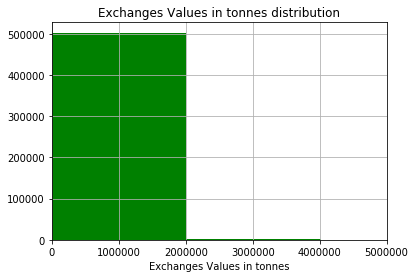

In [144]:

selected_live_stocks[selected_live_stocks['Unit']=='tonnes'].set_index('Item').Value.hist(facecolor='green', align='mid',bins= 10)
plt.xlim(xmin=0, xmax = 0.5*10**7)
plt.xlabel('Exchanges Values in tonnes')
plt.title('Exchanges Values in tonnes distribution')



Text(0.5, 1.0, 'Exchanges Values in K Dollars distribution')

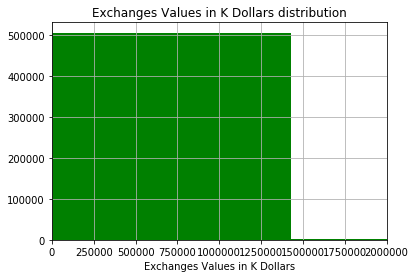

In [143]:

selected_live_stocks[selected_live_stocks['Unit']=='1000 US$'].set_index('Item').Value.hist(facecolor='green', align='mid',bins= 10)
plt.xlim(xmin=0, xmax = 0.2*10**7)

plt.xlabel('Exchanges Values in K Dollars')
plt.title('Exchanges Values in K Dollars distribution')




Most of exchanges in tonnes ranges between $0-2*10^6$, some values go to $4*10^6$ tonnes\
Most of exchanges in K Dollars ranges between $0-15*10^5$, some values go to $2*10^6$ tonnes\
No particular error value are beeing observed nor specefic distribution (ex: uniform,gaussian...)\





Text(0.5, 1.0, 'Top 10 most exported crops in Quantity')

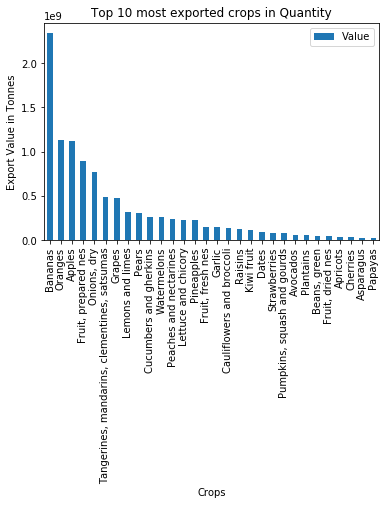

In [345]:
fig=selected_live_stocks[selected_live_stocks['Element'] == 'Export Quantity']\
                                                    .groupby(['Item'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:30]\
                                                    .plot(kind='bar')   
fig.set_xlabel('Crops')
fig.set_ylabel('Export Value in Tonnes')
fig.set_title('Top 10 most exported crops in Quantity')

Text(0.5, 1.0, 'Top 10 most exported crops in Value')

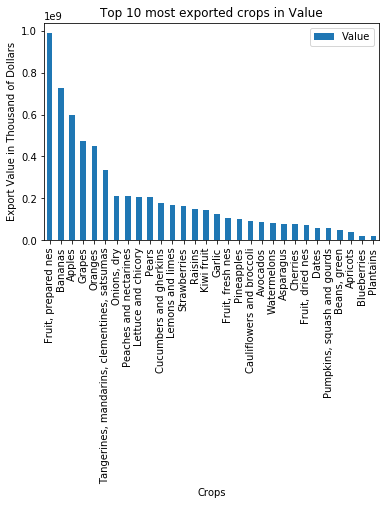

In [346]:
fig=selected_live_stocks[selected_live_stocks['Element'] == 'Export Value']\
                                                    .groupby(['Item'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:30]\
                                                    .plot(kind='bar')
fig.set_xlabel('Crops')
fig.set_ylabel('Export Value in Thousand of Dollars')
fig.set_title('Top 10 most exported crops in Value')


In [46]:
selected_live_stocks.Item.unique()

array(['Coconuts, desiccated', 'Cottonseed', 'Linseed', 'Oilseeds nes',
       'Olives', 'Sesame seed', 'Coconuts', 'Copra', 'Flour, mustard',
       'Groundnuts, shelled', 'Mustard seed', 'Olives preserved',
       'Poppy seed', 'Rapeseed', 'Soya sauce', 'Soybeans',
       'Sunflower seed', 'Peanut butter', 'Kapokseed in shell',
       'Kapokseed shelled', 'Soya curd', 'Soya paste'], dtype=object)

In [61]:
selected_live_stocks[selected_live_stocks['Element'] == 'Export Quantity']\
                                                    .groupby(['Item','Item Code','Unit'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:200]\

,,,Value
Item,Item Code,Unit,
Soybeans,236.0,tonnes,1.898618e+09
"Cake, soybeans",238.0,tonnes,1.457406e+09
"Oil, palm",257.0,tonnes,5.787275e+08
Bananas,486.0,tonnes,5.387601e+08
Rapeseed,270.0,tonnes,2.962413e+08
...,...,...,...
"Juice, plum, concentrated",539.0,tonnes,6.200000e+02
"Oil, poppy",297.0,tonnes,1.140000e+02
Feed minerals,855.0,tonnes,9.000000e+01


In [45]:
selected_live_stocks[selected_live_stocks['Element'] == 'Export Value']\
                                                    .groupby(['Item','Item Code','Unit'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:50]\

,,,Value
Item,Item Code,Unit,
Soybeans,236,1000 US$,585520796.0
Rapeseed,270,1000 US$,112281117.0
Sunflower seed,267,1000 US$,49743621.0
"Groundnuts, shelled",243,1000 US$,42453980.0
Olives preserved,262,1000 US$,30685227.0
Sesame seed,289,1000 US$,26884089.0
Linseed,333,1000 US$,12566869.0
"Coconuts, desiccated",250,1000 US$,9586536.0
Soya sauce,239,1000 US$,7974466.0


In [286]:
selected_live_stocks[selected_live_stocks['Element'] == 'Export Value']\
                                                    .groupby(['Item','Item Code','Unit'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:10]\

,,,Value
Item,Item Code,Unit,
Soybeans,236.0,1000 US$,2.357206e+09
"Fruit, prepared nes",623.0,1000 US$,9.897711e+08
Bananas,486.0,1000 US$,7.246536e+08
Apples,515.0,1000 US$,5.954731e+08
Grapes,560.0,1000 US$,4.732468e+08
Oranges,490.0,1000 US$,4.499952e+08
"Tangerines, mandarins, clementines, satsumas",495.0,1000 US$,3.331630e+08
Sunflower seed,267.0,1000 US$,2.349979e+08
"Onions, dry",403.0,1000 US$,2.114914e+08


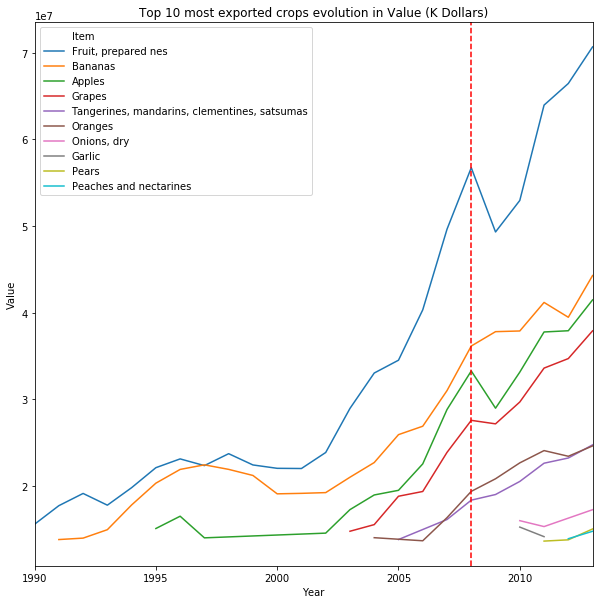

In [98]:
x= selected_live_stocks[selected_live_stocks['Element'] == 'Export Value']\
                                                    .groupby(['Year','Item'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:100]\
                                                    .reset_index()
plt.figure(figsize=(10,10))


ax = sns.lineplot(x="Year", y="Value", hue="Item",
                   data=x)

ax.set_title('Top 10 most exported crops evolution in Value (K Dollars)')
ax.set_xlim([1990,2013])
plt.axvline(2008, 0,10**7,color='r', linestyle='--')



(1990, 2013)

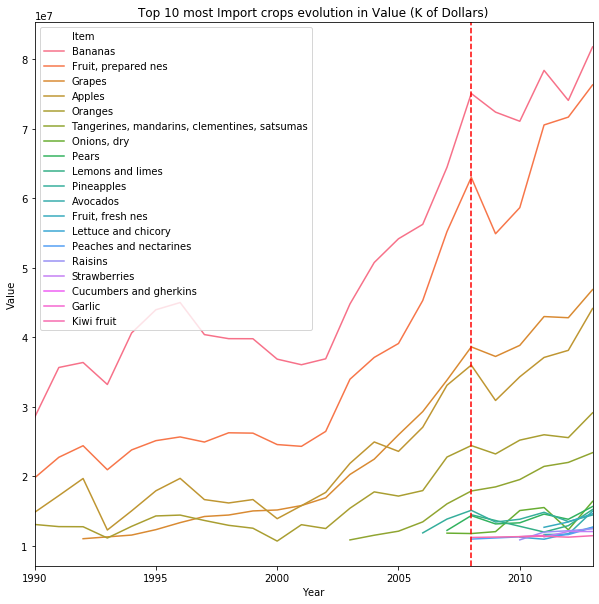

In [97]:
x= selected_live_stocks[selected_live_stocks['Element'] == 'Import Value']\
                                                    .groupby(['Year','Item'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()\
                                                    .reset_index()[:200]

plt.figure(figsize=(10,10))
ax = sns.lineplot(x="Year", y="Value", hue="Item",
                   data=x)
plt.axvline(2008, 0,10**7,color='r',linestyle='--')

ax.set_title('Top 10 most Import crops evolution in Value (K of Dollars)')

ax.set_xlim([1990,2013])




(1990, 2013)

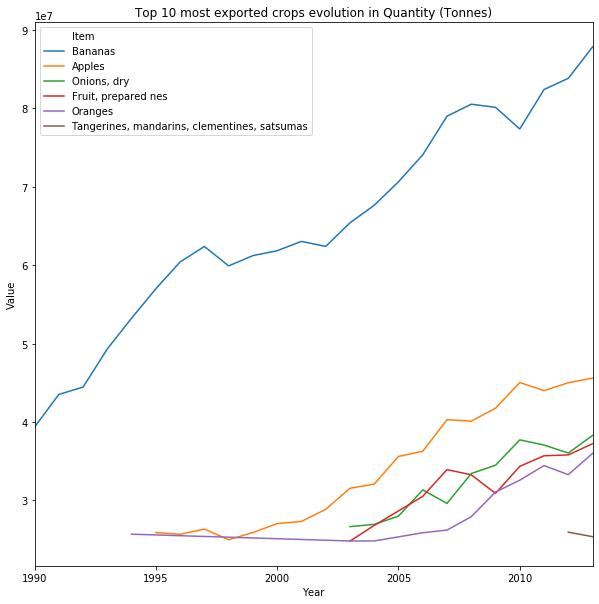

In [152]:
x= selected_live_stocks[selected_live_stocks['Element'] == 'Export Quantity']\
                                                    .groupby(['Year','Item'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:100]\
                                                    .reset_index()
plt.figure(figsize=(10,10))


ax = sns.lineplot(x="Year", y="Value", hue="Item",
                   data=x)

ax.set_title('Top 10 most exported crops evolution in Quantity (Tonnes)')
ax.set_xlim([1990,2013])



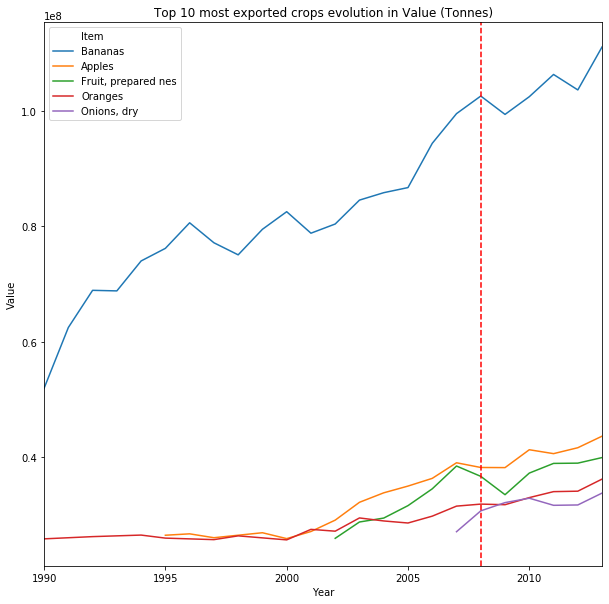

In [154]:
x= selected_live_stocks[selected_live_stocks['Element'] == 'Import Quantity']\
                                                    .groupby(['Year','Item'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:100]\
                                                    .reset_index()
plt.figure(figsize=(10,10))


ax = sns.lineplot(x="Year", y="Value", hue="Item",
                   data=x)

ax.set_title('Top 10 most exported crops evolution in Value (Tonnes)')
ax.set_xlim([1990,2013])





Plots gives some insights on price evolution top 10 exchanged crops. For instance we see princes inflation right at the **2008** economic crises. /

Lets us now make an item Centric Dataframe to investigate correlation beween Export and Import both in Quantity and Values

In [486]:

x= selected_live_stocks.groupby(['Element','Item'])['Value']\
                                                    .sum()\
                                                    .to_frame()
   
item_centric = pd.concat([x.loc['Export Quantity'].rename(columns={ 'Value':'ExpQuantity'}),\
                   x.loc['Export Value'].rename(columns={ 'Value':'ExpValue'})\
                   ,x.loc['Import Quantity'].rename(columns={ 'Value':'ImpQuantity'}),\
                   x.loc['Import Value'].rename(columns={ 'Value':'ImpValue'})],\
                   axis = 1,sort=False).sort_values(by=["ExpQuantity",'ExpValue','ImpQuantity','ImpValue'], ascending = False)
item_centric

,ExpQuantity,ExpValue,ImpQuantity,ImpValue
Bananas,2.342162e+09,724653582.0,2.841806e+09,1.446500e+09
Oranges,1.129797e+09,449995238.0,1.233611e+09,5.719840e+08
Apples,1.121054e+09,595473132.0,1.131829e+09,7.113305e+08
"Fruit, prepared nes",8.906310e+08,989771101.0,9.497863e+08,1.120915e+09
"Onions, dry",7.646903e+08,211491420.0,7.000413e+08,2.227508e+08
"Tangerines, mandarins, clementines, satsumas",4.895851e+08,333163026.0,4.456361e+08,3.369238e+08
Grapes,4.708853e+08,473246839.0,4.876685e+08,6.257511e+08
Lemons and limes,3.200109e+08,169295311.0,3.279278e+08,2.122680e+08
Pears,3.046223e+08,204640898.0,3.194731e+08,2.446738e+08
Cucumbers and gherkins,2.651228e+08,179058454.0,2.489116e+08,1.811235e+08


In [487]:
pd.concat([item_centric.min().rename('min'), item_centric.max().rename('max')], axis=1)


,min,max
ExpQuantity,925731.0,2.342162e+09
ExpValue,0.0,9.897711e+08
ImpQuantity,15854.0,2.841806e+09
ImpValue,14666.0,1.446500e+09


We clearly see scale difference in the Values for each 'Unit'

Min MaxScaling will allow us to obtain reliable information for correlation 


In [478]:
from sklearn import preprocessing

item_centric_values = item_centric.values
min_max_scaler = preprocessing.MinMaxScaler()
item_centric_values = min_max_scaler.fit_transform(item_centric_values)
item_centric_normalized = pd.DataFrame(item_centric_values, columns=item_centric.columns)

In [479]:
item_centric_normalized.corr()

,ExpQuantity,ExpValue,ImpQuantity,ImpValue
ExpQuantity,1.000000,0.828442,0.994706,0.920820
ExpValue,0.828442,1.000000,0.804244,0.954763
ImpQuantity,0.994706,0.804244,1.000000,0.920101
ImpValue,0.920820,0.954763,0.920101,1.000000


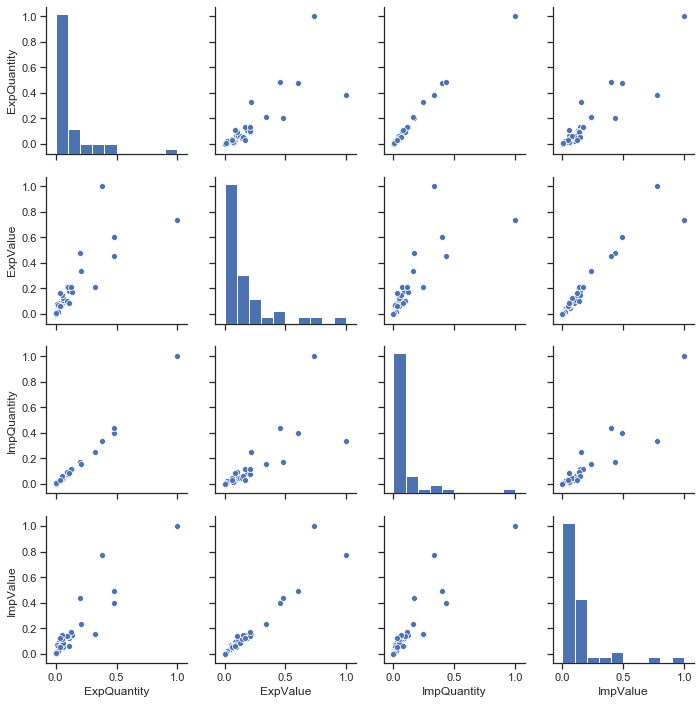

In [482]:
sns.set(style="ticks")
sns.pairplot(item_centric_normalized)

So we clearly see correlation between Export and Import Value varibles for each crop. Which is consistent with the idea that the more it is exported the more it's imported.\
However Exchange quantities are also correlated with one another value. Interesting insight on market behavior for those crops. 

In [147]:
clean_live_stocks.groupby('Item')['Value'].sum().nlargest(3)

Item
Bananas                7.355122e+09
Fruit, prepared nes    3.951103e+09
Apples                 3.559686e+09
Name: Value, dtype: float64

***Year***

In [211]:
clean_live_stocks.Year.unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])

Time frame convered spans form 1961-2013

***Flags***

In [185]:
clean_live_stocks.Flag.unique()

array([nan, '*', 'F', 'R', 'A'], dtype=object)

Nan : Official Data \
\* : Unofficial Figure\
F : FAO estimate \
R : Estimated data using trading partners database\
A : Aggregate, may include official, semi-official, estimated or calculated data

In [187]:
clean_live_stocks.groupby('Flag')['Area Code'].sum().nlargest()

Flag
A    3595020226
F      21050551
*      11586536
R       6863966
Name: Area Code, dtype: int64

NaN          5590861



Lets select Bananas as it was them most exchanged commidty across the years and investigate the role of different countries. 

(1990, 2013)

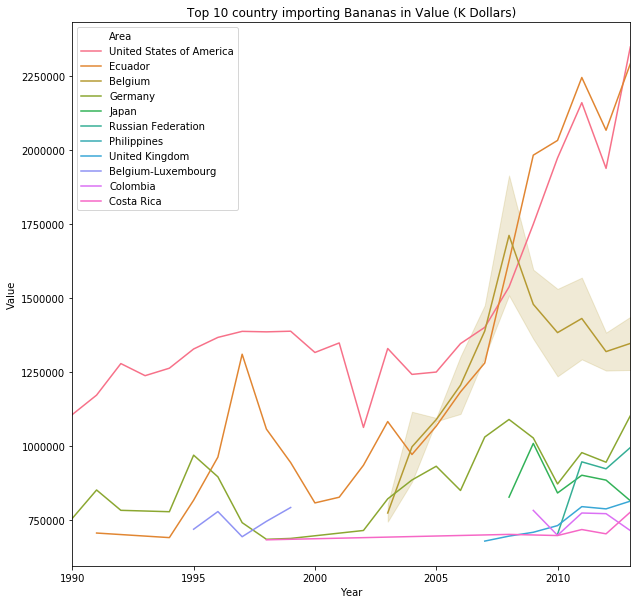

In [204]:
Banana_live_stocks= countries_live_stock[countries_live_stock['Item'] == 'Bananas'].copy()


x= Banana_live_stocks[Banana_live_stocks['Unit'] == '1000 US$']\
                                                    .groupby(['Year','Area','Element'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:130]\
                                                    .reset_index()
plt.figure(figsize=(10,10))


ax = sns.lineplot(x="Year", y="Value", hue="Area",
                   data=x)

ax.set_title('Top 10 country importing Bananas in Value (K Dollars)')
ax.set_xlim([1990,2013])


#array(['tonnes', '1000 US$'], dtype=object)


(1990, 2013)

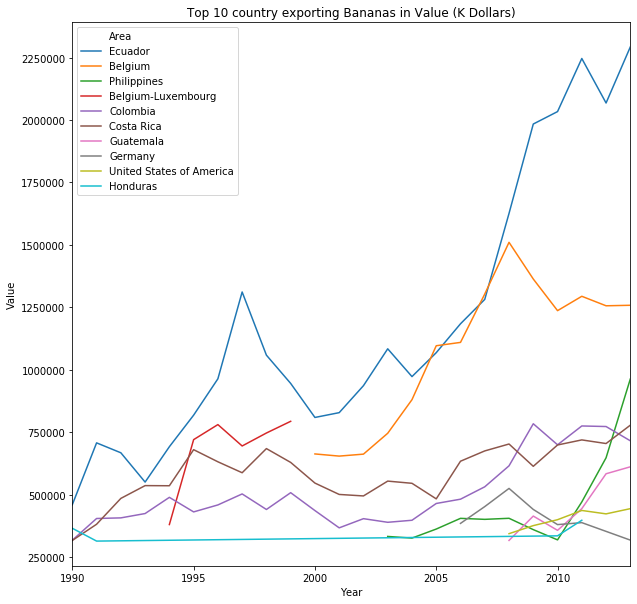

In [195]:

Banana_live_stocks= countries_live_stock[countries_live_stock['Item'] == 'Bananas'].copy()


x= Banana_live_stocks[Banana_live_stocks['Element'] == 'Export Value']\
                                                    .groupby(['Year','Area'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:130]\
                                                    .reset_index()
plt.figure(figsize=(10,10))


ax = sns.lineplot(x="Year", y="Value", hue="Area",
                   data=x)

ax.set_title('Top 10 country exporting Bananas in Value (K Dollars)')

ax.set_xlim([1990,2013])



(1990, 2013)

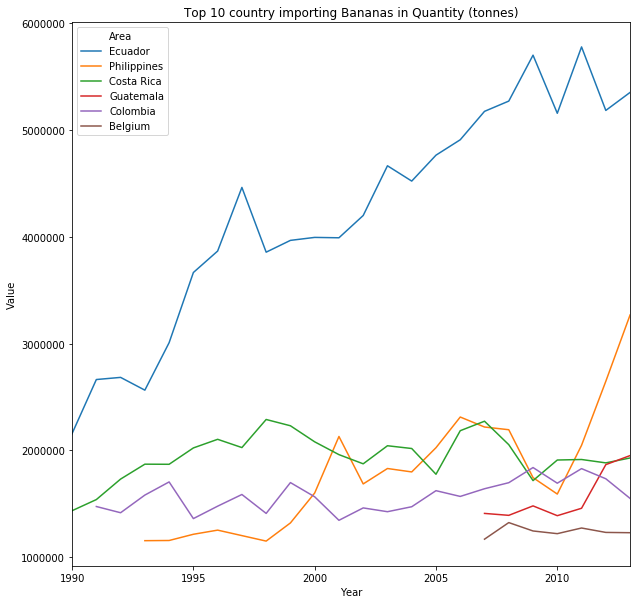

In [200]:
Banana_live_stocks= countries_live_stock[countries_live_stock['Item'] == 'Bananas'].copy()


x= Banana_live_stocks[Banana_live_stocks['Element'] == 'Export Quantity']\
                                                    .groupby(['Year','Area'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:130]\
                                                    .reset_index()
plt.figure(figsize=(10,10))


ax = sns.lineplot(x="Year", y="Value", hue="Area",
                   data=x)

ax.set_title('Top 10 country importing Bananas in Quantity (tonnes)')
ax.set_xlim([1990,2013])



Those plots can give some interesting insights on commodity market and exchanges. For instance Belgium ranks as second biggest exporter of banans in Value.\
However in quantity it is the 5th one. Same for Importation.
One could think that Belgium doesn't produce bananas but only act as an intermediere,buying low, selling high in the banana market. 

(1990, 2013)

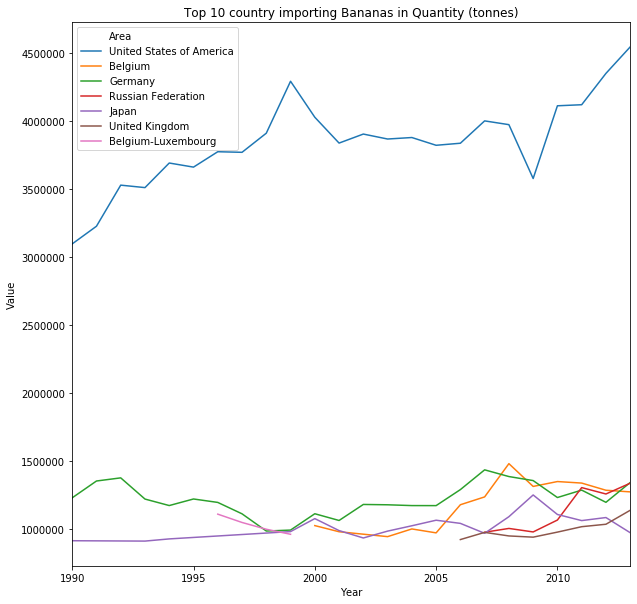

In [199]:
Banana_live_stocks= countries_live_stock[countries_live_stock['Item'] == 'Bananas'].copy()


x= Banana_live_stocks[Banana_live_stocks['Element'] == 'Import Quantity']\
                                                    .groupby(['Year','Area'])['Value']\
                                                    .sum()\
                                                    .sort_values(ascending =False)\
                                                    .to_frame()[:130]\
                                                    .reset_index()
plt.figure(figsize=(10,10))


ax = sns.lineplot(x="Year", y="Value", hue="Area",
                   data=x)

ax.set_title('Top 10 country importing Bananas in Quantity (tonnes)')
ax.set_xlim([1990,2013])



In [64]:

economical_segments_stocks_selected = economical_segments_stocks.set_index('Group').loc[kept_crops].copy()

x= economical_segments_stocks.groupby(['Element','Area','Year'])['Value']\
                                                    .sum()\
                                                    .to_frame()
plt.figure(figsize=(10,10))


x=x.loc['Export Value'].subtract(x.loc['Import Value'],axis=1).reset_index()\
                                                              .sort_values(by =['Value'],ascending =False)[:100]
plt.axhline(y=0, color='r', linestyle='-')


ax = sns.lineplot(x="Year", y="Value", hue="Area",
                   data=x)

plt.ylim(-250000,500000)

KeyError: "None of ['Group'] are in the columns"

In [98]:
bananas = pd.read_csv(datapath + current_fao +"bananas_prod.csv",sep=",", encoding="latin_1")
sum_ = bananas.groupby('year')['value'].sum().sort_values(ascending =False)\
                                        .to_frame()\
                                        .reset_index()
sum_=sum_.rename(columns={'year':'Year'})
sum_=sum_.rename(columns={'value':'Surface Production'})


sum_.Year= sum_.Year.apply(lambda x: int(x))
sum_

,Year,Surface Production
0,2007,93652856.0
1,2006,89788488.0
2,2005,85267584.0
3,2004,80866125.0
4,2003,76112799.0
5,2002,73348156.0
6,2001,71844810.0
7,1999,70178354.0
8,2000,69829922.0
9,1998,64994983.0


In [136]:
x= selected_live_stocks[selected_live_stocks['Item']=='Bananas'].groupby(['Element','Year'])['Value']\
                                                    .sum().sort_values(ascending =False)\
                                                    .to_frame()
 
year_centric = pd.concat([x.loc['Export Quantity'].rename(columns={'Value':'ExpQuantity'}),\
                         x.loc['Import Quantity'].rename(columns={'Value':'ImpQuantity'})],axis = 1,sort=False)\
                        .sort_values(by=["ExpQuantity",'ImpQuantity'], ascending = False).reset_index()[6:-1]\
                        .reset_index()
                         


year_centric.Year=year_centric.Year.apply(lambda x: int(x))
year_centric['Surface Production']= sum_['Surface Production']
year_centric=year_centric.drop(columns = ['index','Year'])
year_centric.head()

,ExpQuantity,ImpQuantity,Surface Production
0,17527838.0,18672487.0,93652856.0
1,17001013.0,16876259.0,89788488.0
2,16383011.0,15855090.0,85267584.0
3,15725886.0,15538832.0,80866125.0
4,15297949.0,15187577.0,76112799.0


In [137]:
year_centric.corr()

,ExpQuantity,ImpQuantity,Surface Production
ExpQuantity,1.000000,0.99719,0.982888
ImpQuantity,0.997190,1.00000,0.982180
Surface Production,0.982888,0.98218,1.000000


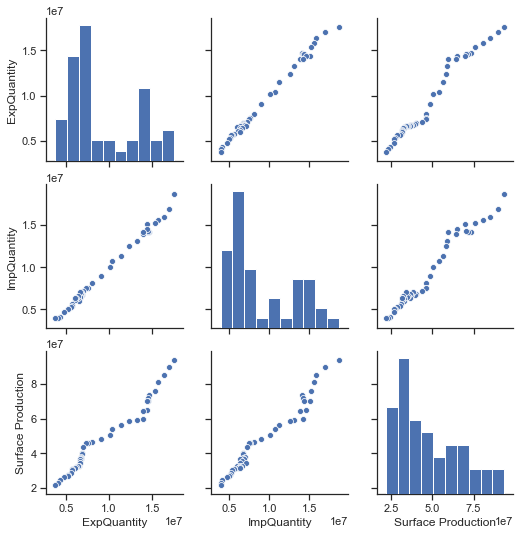

In [138]:
sns.set(style="ticks")
sns.pairplot(year_centric)

___Conclusion___: Data contains missing values, only the ones in the Value feature were discarded. Data contains information regarding the exchanges (import and export) per countrie, region and continent. Exchanges or both explained in termes of value (Thousands of dollars) and quantity (tonnes). All kinds of crops figure in the Item feature as single items as well as per categories. 